In [1]:
import os

# مسیر فایل در Google Drive
zip_path = '/content/drive/MyDrive/c2a_uav_human_etection_in_disaster.zip'  # اسم فایل اصلاح‌شده
new_zip_path = '/content/c2a_uav_human_detection_in_disaster.zip'

# کپی فایل به /content/
try:
    !cp "$zip_path" "$new_zip_path"
    print(f"File copied to {new_zip_path}")
except Exception as e:
    print(f"Error copying file: {e}")

# چک کردن وجود فایل
if os.path.exists(new_zip_path):
    print(f"File {new_zip_path} is ready.")
else:
    print(f"Error: File {new_zip_path} not found. Check the source path.")

File copied to /content/c2a_uav_human_detection_in_disaster.zip
File /content/c2a_uav_human_detection_in_disaster.zip is ready.


In [2]:
extract_path = '/content/new_dataset3'  # مسیر استخراج (در /content/ برای سرعت)

os.makedirs(extract_path, exist_ok=True)

!unzip -q "$new_zip_path" -d "$extract_path"

# چک کردن محتویات بعد از استخراج
extracted_files = os.listdir(extract_path)
print(f"فایل‌ها در {extract_path}:")
for item in extracted_files[:10]:  # فقط ۱۰ تا اول برای جلوگیری از خروجی طولانی
    print(f"  - {item}")
print(f"تعداد کل: {len(extracted_files)}")
if len(extracted_files) > 10:
    print("  ... (و بقیه)")

فایل‌ها در /content/new_dataset3:
  - new_dataset3
تعداد کل: 1


In [3]:
# سلول 3: نمایش ساختار دیتاست
import os

dataset_path = '/content/new_dataset3'
print("ساختار دیتاست:")
!find "$dataset_path" -type f | head -20
print("\nتعداد فایل‌ها:")
!find "$dataset_path" -type f | wc -l

ساختار دیتاست:
/content/new_dataset3/new_dataset3/train/images/traffic_incident_image0014_0.png
/content/new_dataset3/new_dataset3/train/images/flood_image0084_4.png
/content/new_dataset3/new_dataset3/train/images/collapsed_building_image0202_0.png
/content/new_dataset3/new_dataset3/train/images/traffic_incident_image0358_1.png
/content/new_dataset3/new_dataset3/train/images/collapsed_building_image0017_1.png
/content/new_dataset3/new_dataset3/train/images/flood_image0465_2.png
/content/new_dataset3/new_dataset3/train/images/fire_image0118_3.png
/content/new_dataset3/new_dataset3/train/images/flood_image0008_0.png
/content/new_dataset3/new_dataset3/train/images/flood_image0210_4.png
/content/new_dataset3/new_dataset3/train/images/collapsed_building_image0110_2.png
/content/new_dataset3/new_dataset3/train/images/flood_image0400_4.png
/content/new_dataset3/new_dataset3/train/images/collapsed_building_image0209_4.png
/content/new_dataset3/new_dataset3/train/images/flood_image0256_0.png
/c

In [4]:
# سلول ۱: اصلاح ساختار پوشه
import shutil
import os

# مسیرهای فعلی
inner_path = '/content/new_dataset3/new_dataset3'
outer_path = '/content/new_dataset3'

# اگر پوشه داخلی وجود دارد، محتویاتش رو به بیرون منتقل کن
if os.path.exists(inner_path):
    print("در حال اصلاح ساختار پوشه...")
    for item in os.listdir(inner_path):
        src = os.path.join(inner_path, item)
        dst = os.path.join(outer_path, item)
        if os.path.exists(dst):
            if os.path.isdir(dst):
                shutil.rmtree(dst)  # حذف اگر تکراری
            else:
                os.remove(dst)
        shutil.move(src, dst)

    # حذف پوشه خالی داخلی
    os.rmdir(inner_path)
    print("ساختار اصلاح شد: لایه تو در تو حذف شد.")
else:
    print("پوشه داخلی پیدا نشد.")

در حال اصلاح ساختار پوشه...
ساختار اصلاح شد: لایه تو در تو حذف شد.


In [5]:
# سلول ۲: نمایش ساختار نهایی
!find /content/new_dataset3 -maxdepth 2 -type d
print("\nنمونه تصاویر:")
!find /content/new_dataset3/train/images -name "*.jpg" -o -name "*.png" | head -5

/content/new_dataset3
/content/new_dataset3/train
/content/new_dataset3/train/images
/content/new_dataset3/train/labels
/content/new_dataset3/All labels with Pose information
/content/new_dataset3/All labels with Pose information/labels
/content/new_dataset3/val
/content/new_dataset3/val/images
/content/new_dataset3/val/labels
/content/new_dataset3/test
/content/new_dataset3/test/images
/content/new_dataset3/test/labels

نمونه تصاویر:
/content/new_dataset3/train/images/traffic_incident_image0014_0.png
/content/new_dataset3/train/images/flood_image0084_4.png
/content/new_dataset3/train/images/collapsed_building_image0202_0.png
/content/new_dataset3/train/images/traffic_incident_image0358_1.png
/content/new_dataset3/train/images/collapsed_building_image0017_1.png


In [6]:
# سلول ۳: نمایش یک فایل لیبل (برای تشخیص فرمت)
import os

label_file = None
for split in ['train', 'val']:
    label_dir = f'/content/new_dataset3/{split}/labels'
    if os.path.exists(label_dir):
        files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]
        if files:
            label_file = os.path.join(label_dir, files[0])
            break

if label_file:
    print(f"نمونه لیبل: {label_file}")
    !head -5 "$label_file"
else:
    print("هیچ فایل .txt پیدا نشد!")

نمونه لیبل: /content/new_dataset3/train/labels/collapsed_building_image0078_3.txt
0 0.945714 0.508065 0.091429 0.043011
0 0.841429 0.868280 0.014286 0.010753
0 0.087143 0.837366 0.020000 0.013441
0 0.298571 0.956989 0.014286 0.010753
0 0.130000 0.407258 0.031429 0.051075


In [7]:
# سلول ۳: نصب و بارگذاری مدل
!pip install ultralytics --quiet
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # nano برای تست سریع
# model = YOLO('yolov8m.pt')  # medium برای دقت بیشتر (کامنت رو بردار)

print("مدل YOLOv8-detect بارگذاری شد")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
مدل YOLOv8-detect بارگذاری شد


In [8]:
#  ساخت data.yaml با چک مسیرها
import os

# مسیرهای اصلی
base_path = '/content/new_dataset3'
train_img = f'{base_path}/train/images'
val_img = f'{base_path}/val/images'
test_img = f'{base_path}/test/images'

# چک کردن وجود پوشه‌ها
missing = []
for p in [train_img, val_img]:
    if not os.path.exists(p):
        missing.append(p)

if missing:
    print("خطا: پوشه‌های زیر وجود ندارند:")
    for p in missing:
        print(f"  ❌ {p}")
    print("\nساختار فعلی:")
    !find /content/new_dataset3 -maxdepth 3 -type d | head -20
    raise SystemExit("ابتدا ساختار پوشه‌ها را اصلاح کنید.")
else:
    print("همه پوشه‌ها وجود دارند")

# ساخت data.yaml
yaml_content = f"""path: {base_path}
train: train/images
val: val/images
test: test/images

nc: 1
names: ['human']
"""

yaml_path = f'{base_path}/data.yaml'
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"data.yaml با موفقیت در {yaml_path} ساخته شد")
!cat "$yaml_path"

همه پوشه‌ها وجود دارند
data.yaml با موفقیت در /content/new_dataset3/data.yaml ساخته شد
path: /content/new_dataset3
train: train/images
val: val/images
test: test/images

nc: 1
names: ['human']


In [9]:
# سلول ۴: شروع آموزش
results = model.train(
    data='/content/new_dataset3/data.yaml',
    epochs=25,
    imgsz=640,
    batch=16,
    name='uav_human_detection_v1',
    patience=10,
    augment=True,      # flip, mosaic, hsv, scale
    project='/content/runs',
    exist_ok=True
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/new_dataset3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=uav_human_detection_v1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, p

In [10]:
# سلول ۱: نمایش وزن‌ها
!ls -lh /content/runs/uav_human_detection_v1/weights/

total 12M
-rw-r--r-- 1 root root 6.0M Nov  2 16:10 best.pt
-rw-r--r-- 1 root root 6.0M Nov  2 16:10 last.pt



0: 640x640 41 humans, 5.6ms
1: 640x640 14 humans, 5.6ms
2: 640x640 17 humans, 5.6ms
Speed: 4.8ms preprocess, 5.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


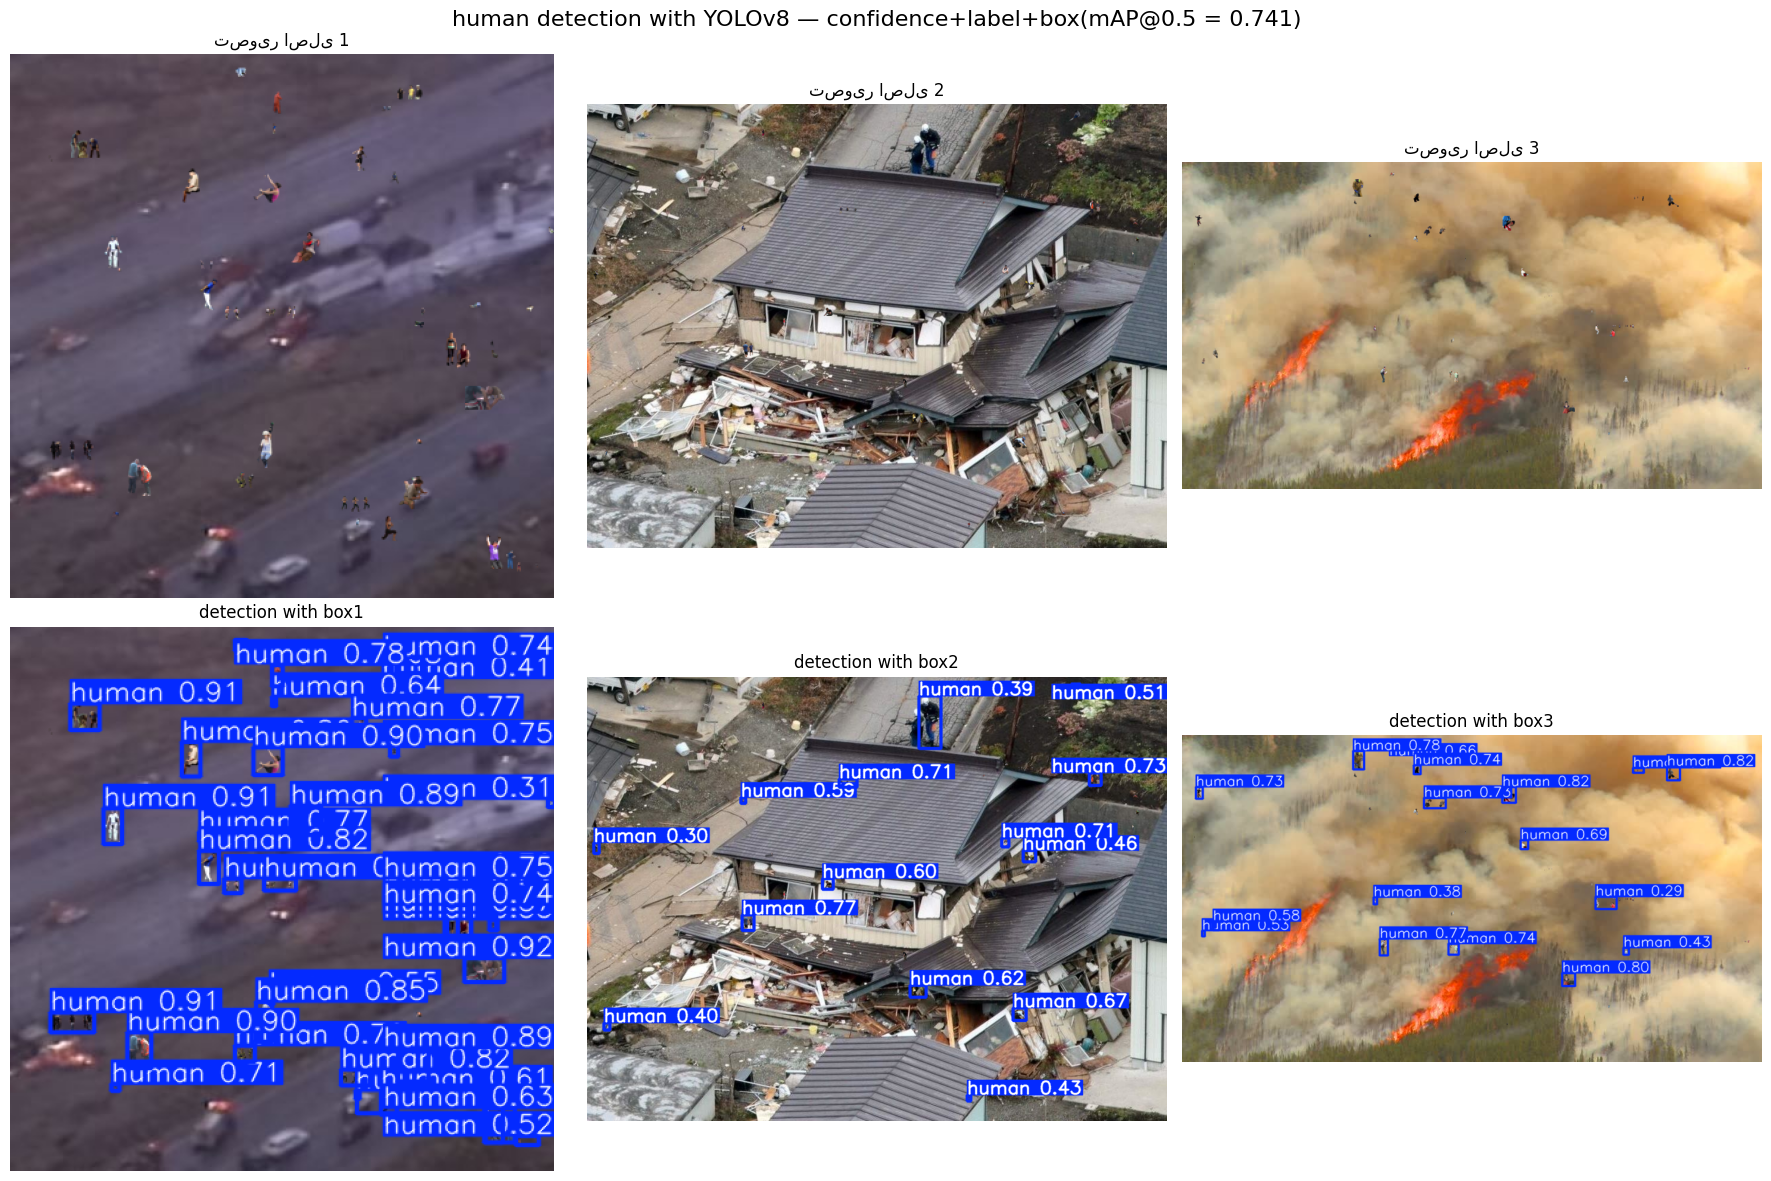

images saved/content/boxed_images


In [16]:
# سلول نهایی: رسم دستی bounding box با results.plot()
from ultralytics import YOLO
import glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# بارگذاری مدل
model = YOLO('/content/runs/uav_human_detection_v1/weights/best.pt')

# ۳ تصویر نمونه
val_images = glob.glob('/content/new_dataset3/val/images/*.jpg')[:3]
if not val_images:
    val_images = glob.glob('/content/new_dataset3/val/images/*.png')[:3]

# پیش‌بینی
results = model(val_images)

# ساخت پوشه خروجی
os.makedirs('/content/boxed_images', exist_ok=True)

# نمایش + ذخیره
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (img_path, result) in enumerate(zip(val_images, results)):
    # تصویر اصلی
    orig_img = Image.open(img_path)
    axes[0, i].imshow(orig_img)
    axes[0, i].set_title(f"تصویر اصلی {i+1}")
    axes[0, i].axis('off')

    # تصویر با bounding box (رسم دستی)
    plotted = result.plot()  #
    plotted_pil = Image.fromarray(plotted[..., ::-1])  # BGR → RGB

    # ذخیره
    save_path = f'/content/boxed_images/detected_{i+1}.jpg'
    plotted_pil.save(save_path)

    # نمایش
    axes[1, i].imshow(plotted_pil)
    axes[1, i].set_title(f"detection with box{i+1}")
    axes[1, i].axis('off')

plt.suptitle("human detection with YOLOv8 — confidence+label+box(mAP@0.5 = 0.741)", fontsize=16)
plt.tight_layout()
plt.show()

print("images saved/content/boxed_images")

In [17]:
# دانلود نهایی با تصاویر باکس‌دار
!zip -r /content/UAV_FINAL_WITH_BOXES.zip \
    /content/runs/uav_human_detection_v1/weights/best.pt \
    /content/runs/uav_human_detection_v1/results.png \
    /content/runs/uav_human_detection_v1/confusion_matrix.png \
    /content/boxed_images/ \
    /content/new_dataset3/data.yaml

from google.colab import files
files.download('/content/UAV_FINAL_WITH_BOXES.zip')

  adding: content/runs/uav_human_detection_v1/weights/best.pt (deflated 9%)
  adding: content/runs/uav_human_detection_v1/results.png (deflated 8%)
  adding: content/runs/uav_human_detection_v1/confusion_matrix.png (deflated 34%)
  adding: content/boxed_images/ (stored 0%)
  adding: content/boxed_images/detected_3.jpg (deflated 1%)
  adding: content/boxed_images/detected_1.jpg (deflated 1%)
  adding: content/boxed_images/detected_2.jpg (deflated 0%)
  adding: content/new_dataset3/data.yaml (deflated 21%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>